In [1]:
import numpy as np
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt 
import sklearn
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(41)

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

spark = SparkSession.builder.appName("introdution").getOrCreate()

In [2]:
gpd_df = spark.read.csv('gdp_per_capita.csv', header=True, inferSchema=True)
lifesat_df = spark.read.csv('lifesat.csv', header=True, inferSchema=True)

gpd_df.show(5)
lifesat_df.show(10)

+-----------+----+----+---------------------------------------------------+
|     Entity|Code|Year|GDP per capita, PPP (constant 2017 international $)|
+-----------+----+----+---------------------------------------------------+
|Afghanistan| AFG|2002|                                   1189.78466765718|
|Afghanistan| AFG|2003|                                   1235.81006329565|
|Afghanistan| AFG|2004|                                   1200.27801321734|
|Afghanistan| AFG|2005|                                   1286.79365893927|
|Afghanistan| AFG|2006|                                   1315.78911741835|
+-----------+----+----+---------------------------------------------------+
only showing top 5 rows

+--------+----------------+-----------------+
| Country|           GDPpc|Life_satisfaction|
+--------+----------------+-----------------+
|  Russia|26456.3879381321|              5.8|
|  Greece|27287.0834009302|              5.4|
|  Turkey|28384.9877846263|              5.5|
|  Latvia|29932

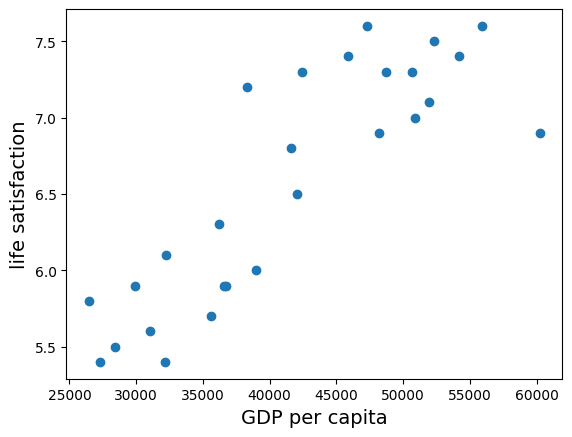

In [3]:
pd_lifesat_df = lifesat_df.toPandas()

x = pd_lifesat_df[['GDPpc']].values
y = pd_lifesat_df[['Life_satisfaction']].values

plt.scatter(x, y)
plt.xlabel('GDP per capita')
plt.ylabel('life satisfaction')
plt.show()

In [4]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

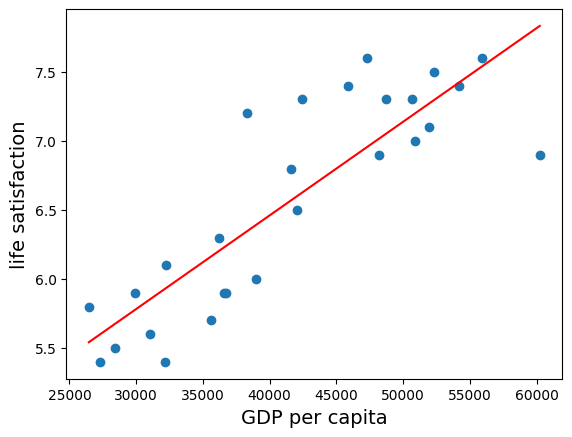

In [17]:
lin = np.linspace(x.min(), x.max(), 2)
plt.scatter(x, y)
plt.xlabel('GDP per capita')
plt.ylabel('life satisfaction')
plt.plot(lin, lin * model.coef_[0] + model.intercept_[0], c='r')

In [6]:
pd_gdp_df = gpd_df.toPandas()
pd_gdp_df.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDPpc'}, inplace=True)

In [7]:
pd_gdp_df2020 = pd_gdp_df[pd_gdp_df['Year'] == 2020]
pd_gdp_df2020 = pd_gdp_df2020.drop(['Code', 'Year'], axis=1)
pd_gdp_df2020.columns = ['Country', 'GDPpc']
pd_gdp_df2020.set_index("Country", inplace=True)

In [8]:
oecd_bli = pd.read_csv('oecd_bli.csv')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
cg = oecd_bli[oecd_bli['Country'] == 'Poland']
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli[oecd_bli["Country"]=="Poland"].head(50)


In [9]:
full_country_stats = pd.merge(left=oecd_bli, right=pd_gdp_df2020,left_index=True, right_index=True)
full_country_stats.sort_values(by='GDPpc', inplace=True)
full_country_stats = full_country_stats[['GDPpc', 'Life satisfaction']]
full_country_stats.head(10)

,GDPpc,Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9


In [12]:
#full_country_stats['Color'] 
print(np.linspace(1,len(full_country_stats),len(full_country_stats)))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


C:\Users\Szymon\AppData\Local\Temp\ipykernel_18168\1857209536.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, c = c1, cmap='viridis', edgecolors='k')


(5466.189671582, 116261.157353302, 4.5, 8.0)

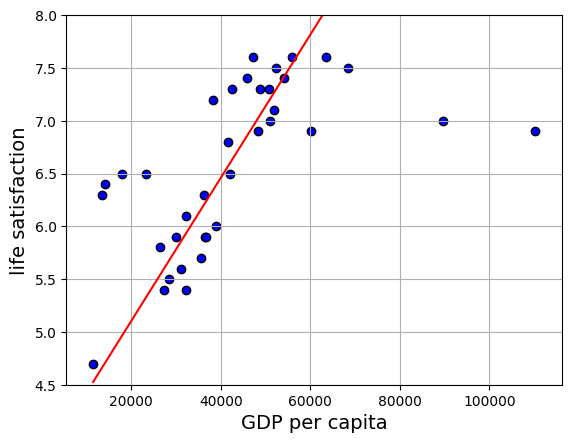

In [57]:
import matplotlib.cm as cm
x = full_country_stats['GDPpc'].values
y = full_country_stats['Life satisfaction'].values
c = cm.rainbow(np.random.permutation(np.linspace(0,1,len(full_country_stats))))
c1 = 'b'
plt.scatter(x,y, c = c1, cmap='viridis', edgecolors='k')
plt.xlabel('GDP per capita')
plt.ylabel('life satisfaction')
#c2 = 'black'
plt.grid(True)
plt.plot([min(x), max(x)], [min(x), max(x)] * model.coef_[0] + model.intercept_[0], c = 'r')
#plt.scatter(x, x * model.coef_[0] + model.intercept_[0], c=c2)
plt.axis([min(x) - 6000,max(x) + 6000,4.5,8])

In [39]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats['GDPpc'] >= min_gdp) & (full_country_stats['GDPpc'] <= max_gdp)]
country_stats.head()

,GDPpc,Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


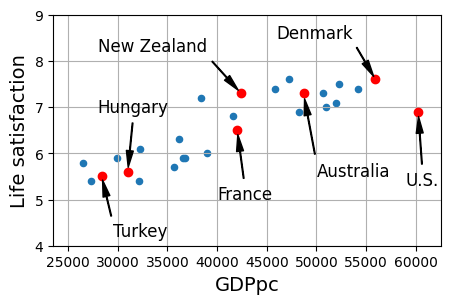

In [41]:
gdppc_col = 'GDPpc'
lifesat_col = 'Life satisfaction'
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [58]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDPpc,Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


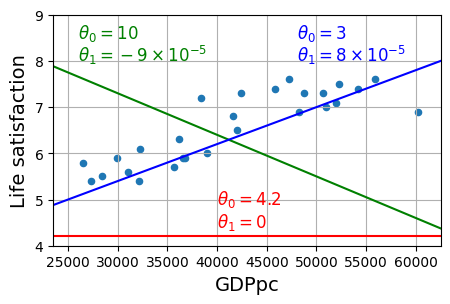

In [60]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [65]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


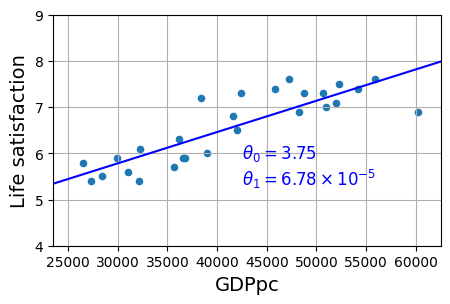

In [67]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 2)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [80]:
cyprGDP = pd_gdp_df2020['GDPpc'].loc['Cyprus']
cyprPred = lin1.predict([[cyprGDP]])[0][0]
cyprPred

6.301656332738056

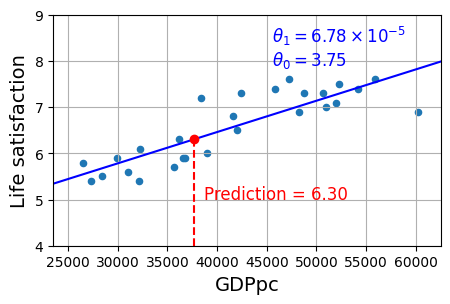

In [86]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprGDP, cyprGDP],
         [min_life_sat, cyprPred], "r--")
plt.text(cyprGDP + 1000, 5.0,
         fr"Prediction = {cyprPred:.2f}", color="r")
plt.plot(cyprGDP, cyprPred, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [89]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDPpc,Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [90]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

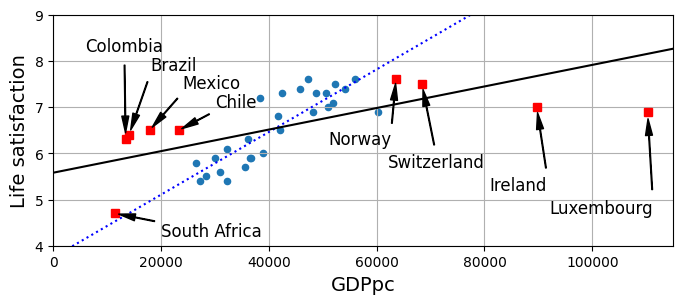

In [92]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()